Download the following packages in case the following libraries doesn't import:

matplotlib
seaborn
numpy &
pandas

Information of the dataset:

Our dataset has total 558837 uniques values with both categorical aswell as numericals values present in it.
The dataset contains all the necessary information required for an individual for purchasing a preowned car from a seller.
VIN stands for vehicle identification number & there are total 558833 unique VIN number present in the dataset.
Moreover, it contains 558837 unique odometer reading, of the total distance travelled.Inadddition, it also contains information related to maker,model,color,& interior etc related information of the car.
Dataset contains not only useful information ,there's also unnecessary information which is dropped in the next steps.
MMR stands for Manheim Market Report it's used as a indicator in car wholesale market


Problem Statement:

Whenever we're purchasing a Car wheter it is a new or a used one, we need to consider lot of factors. the price of the car varies depending upon the manufacuturer, model, the year it was made & type of transmission etc.

Our goal is to identify the factors that causes the price inflation of used cars and also we can find out top 10 car makers.

Load the following Packages 

In [11]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Load the dataset and skip if badlines are present in the dataset:

In [12]:

df = pd.read_csv("car_prices (2).csv",error_bad_lines= False)
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,Unnamed: 16
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),NaN
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),NaN
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),NaN
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),NaN
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,4.5,18255.0,silver,black,avis corporation,35300,33000,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT),NaN
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200,30800,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT),NaN
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,4.8,50561.0,black,black,financial services remarketing (lease),29800,34000,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT),NaN
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,3.8,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100,11100,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT),NaN


Data set information:

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          558837 non-null  object 
 2   model         558837 non-null  object 
 3   trim          548186 non-null  object 
 4   body          558837 non-null  object 
 5   transmission  493484 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     558837 non-null  object 
 9   odometer      558837 non-null  float64
 10  color         558837 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558837 non-null  object 
 14  sellingprice  558837 non-null  int64  
 15  saledate      558837 non-null  object 
 16  Unnamed: 16   10327 non-null   object 
dtypes: float64(1), int64(2), object(14)
memory usage

DATA CLEANING:

In this phase we will start cleaning our raw dataset & remove all the uncessary information present in it. Moreover, we will replace the missing values with appropriate values such as unkown and Nan in it.

Based on our dataset we will delete the two coloumns i.e, saledate and unnamed column number 16 for now, using drop function.

In [14]:
df.drop(['Unnamed: 16','saledate'], axis=1, inplace=True)

df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,4.5,18255.0,silver,black,avis corporation,35300,33000
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200,30800
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,4.8,50561.0,black,black,financial services remarketing (lease),29800,34000
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,3.8,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100,11100


Our data set has so many values which makes the analysing part  a little complicated.So, it's better to select certain data &  use it & rest all delete it.
So, now, only 10,000 values are kept/used out of 558837 in the dataset & rest all is deleted and it stored as df1


In [18]:

df1 = df.drop(df.index[10000:558837 ])

Updated shape of the dataset:

In [21]:

df1.shape

(10000, 15)

In [22]:
df1.to_csv('Cars_price.csv', index=False)

Analyzation of the dataset:

In [24]:
def plot_values(df1, colname, n_values=20, top_n=True, bins=10):
    if df[colname].dtype == "float":
        return hist_values(df1=df1, colname=colname, bins=bins)
    
    else:
        ascending = not top_n
        return count_values(df1=df1, colname=colname, n_values=n_values, ascending=ascending)



def count_values(df1, colname, n_values=20, ascending=False):
    counts = df1\
        [colname]\
        .astype(str)\
        .replace("nan", "unknown")\
        .value_counts()\
        .sort_values(ascending=ascending)
    
    plot = counts\
        .iloc[:n_values]\
        .plot\
        .bar(title=f"{colname} ({counts.shape[0]} unique values)")
    
    return plot



Here we're replacing our blank cells of the data set with unknown and nan with respect to the attriutes and we're sorting ur values in ascending order,


Growth of sales from the year 2003 to 2011:


<AxesSubplot:title={'center':'year (29 unique values)'}>

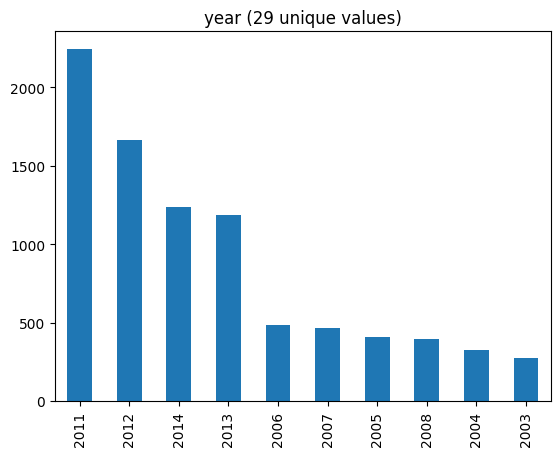

In [25]:
colname = df1.columns[0]
plot_values(df1, colname, n_values=10, top_n=True, bins=7.5)

(array([5.899e+03, 3.368e+03, 5.420e+02, 1.260e+02, 4.100e+01, 1.000e+01,
        6.000e+00, 2.000e+00, 3.000e+00, 3.000e+00]),
 array([25.0, 14922.5, 29820.0, 44717.5, 59615.0, 74512.5, 89410.0,
        104307.5, 119205.0, 134102.5, 149000.0], dtype=object),
 <BarContainer object of 10 artists>)

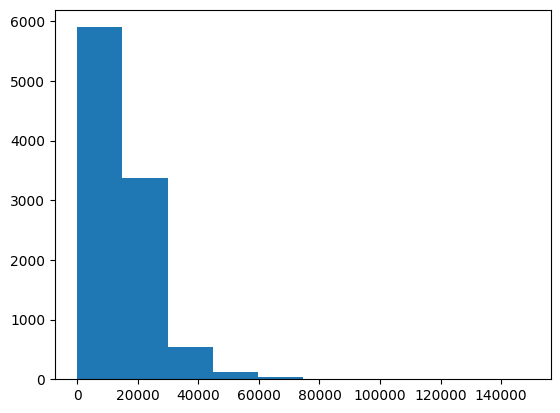

In [18]:
#mmr histogram
plt.hist(df1['mmr'])

Analsysis of Selling price distribution 

Text(0, 0.5, 'Freq')

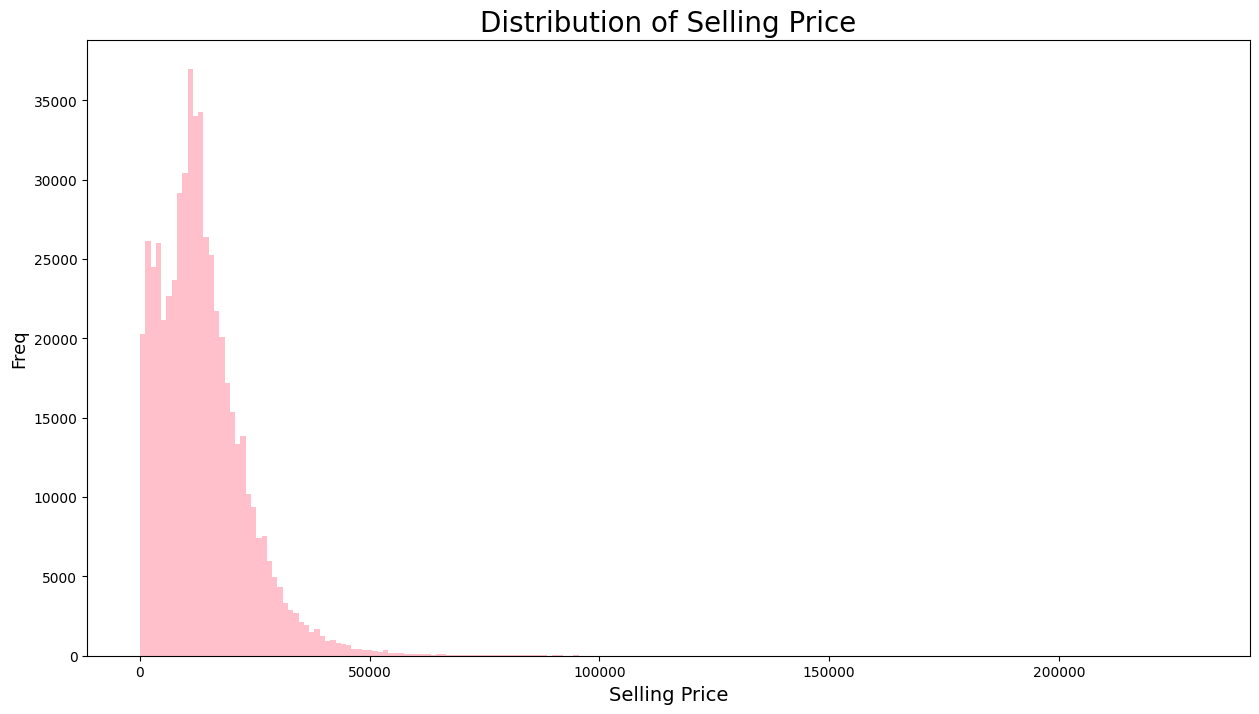

In [20]:


plt.figure(figsize=(15,8))
plt.hist(df['sellingprice'],bins=200,color='pink')
plt.title('Distribution of Selling Price',fontsize=20)

plt.xlabel('Selling Price',fontsize=14)
plt.ylabel('Freq',fontsize=13)

In [27]:
df1['sellingprice'].describe()

count     10000.000000
mean      14353.107100
std       11211.765516
min           1.000000
25%        6600.000000
50%       12400.000000
75%       19500.000000
max      154000.000000
Name: sellingprice, dtype: float64

The majority of transactions were for between $15,000 and $30,000, which suggests a rightward skew in the distribution. 
Outliers exist in our dataset after 50000. 
The selling price of 75% of the data was less than $22000. 
My own opinion is that vintage or luxury automobiles like Ferrari, BMW, etc. should be the priciest brands.

Let's find out:

In [28]:
df1.loc[df1['sellingprice']>22000,'make'].value_counts()

BMW              377
Infiniti         219
Mercedes-Benz    204
Ford             163
Chevrolet         94
Audi              68
Toyota            58
Land Rover        54
Hyundai           50
Jaguar            46
Cadillac          46
Lexus             45
Mazda             44
Ram               40
GMC               38
Honda             29
Acura             27
Volvo             26
bmw               24
Porsche           23
Dodge             19
Nissan            18
Jeep              14
Chrysler          13
Unknown           13
Kia               13
Bentley           10
Lincoln            8
Subaru             7
Buick              7
porsche            4
HUMMER             4
mercedes           2
chevrolet          2
Volkswagen         2
Ferrari            2
Maserati           1
land rover         1
MINI               1
lexus              1
Mitsubishi         1
Name: make, dtype: int64

Our suspicion was accurate. Leading the list are BMW, Benz, Jaguars, and Ferrari. 
As our research progresses, it's also interesting to note that the make attribute might benefit from some data cleansing because there don't appear to be many recurring makes (BMW ,bmw , Land Rover,land rover etc).
For simplicity, we won't do this in this study and will instead focus on the general analysis section.

In [31]:
df1['make'].value_counts()[:5]


Ford         1254
Chevrolet     900
BMW           820
Toyota        701
Nissan        652
Name: make, dtype: int64

In [32]:
top_make=df1['make'].value_counts()[:10].index
top_make

Index(['Ford', 'Chevrolet', 'BMW', 'Toyota', 'Nissan', 'Honda', 'Hyundai',
       'Infiniti', 'Mercedes-Benz', 'Dodge'],
      dtype='object')

Since there are nearly 96 makes in our dataset, let's focus on the top 10 only & start analysis of them

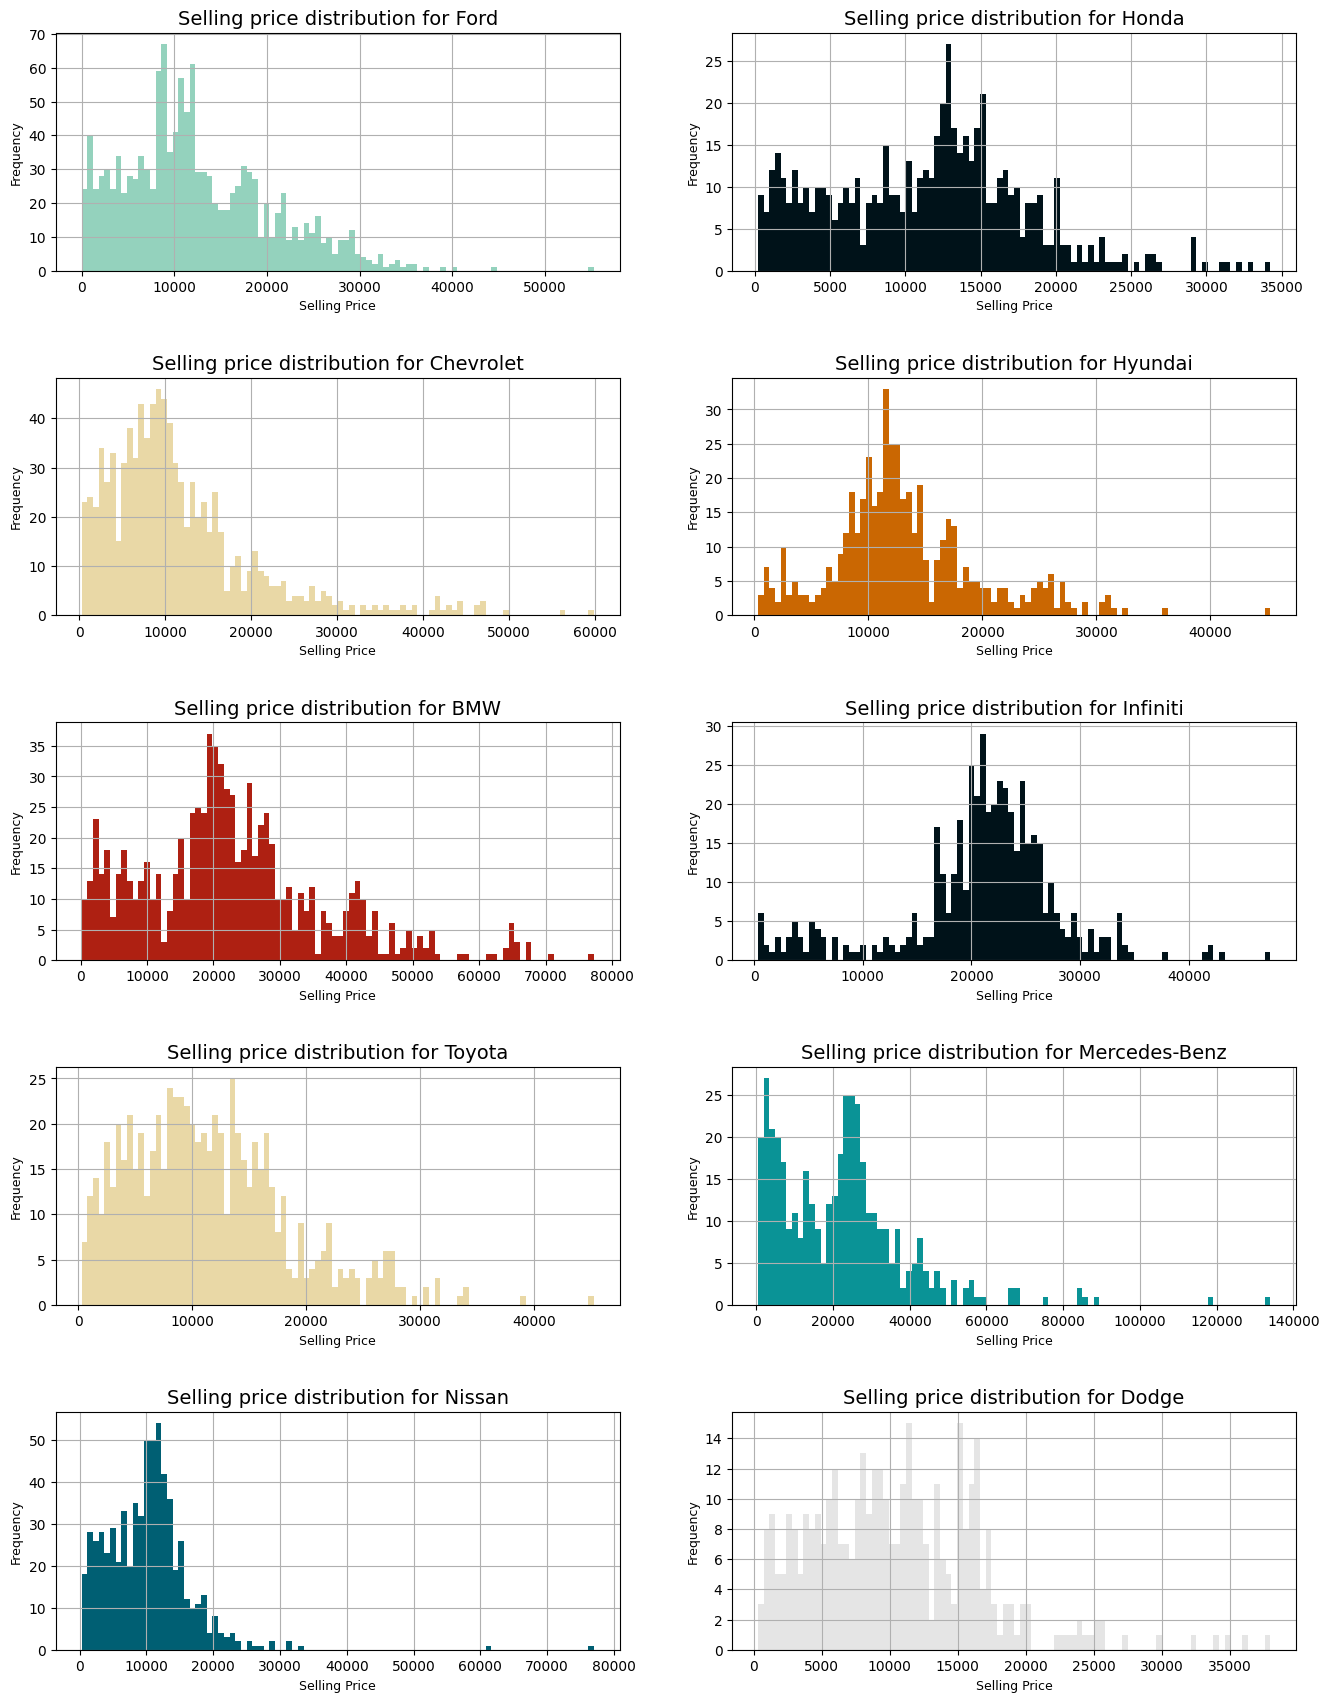

In [35]:
fig,ax=plt.subplots(5,2,figsize=(16,21))
color_list=['#0a9396','#ca6702','#ae2012','#9b2226','#001219','#005f73','#94d2bd','#e9d8a6','#e5e5e5','#e07a5f'] #coolors.co
i=0
for t in top_make:
    df1.loc[df1['make']==t,'sellingprice'].hist(ax=ax[i%5][i//5],bins=90,color=np.random.choice(color_list,replace=False))
    ax[i%5][i//5].set_xlabel('Selling Price',fontsize=9)
    ax[i%5][i//5].set_ylabel('Frequency',fontsize=9)
    ax[i%5][i//5].set_title(f'Selling price distribution for {t}',fontsize=14)
    plt.subplots_adjust(hspace=0.45)
    i+=1

In [39]:
df1.loc[df1['make']=='Ford','sellingprice'].describe()

count     1254.000000
mean     12416.826954
std       7982.721771
min          1.000000
25%       6700.000000
50%      11000.000000
75%      17475.000000
max      55250.000000
Name: sellingprice, dtype: float64

The top 10 makes are distributed in a distinctive way, and the price averages vary maker to maker.The following average prices with respect to different makers:

Ford,chevrolet, nissan have an average price for used car as $10,000.

Where as Honda at $12,500, Toyota and Hyundai have an average price of and between $10,000-15,000$ and 

BMW prices are between $10,000-$20,000. 

Moreover, infiniti market price is at  $20,000-$24,000 avg 

In the end, Mercedez benz & Dodge are the most priced  and the least priced makers at $20,000-30,000 and $8,000-$12,000


The remaining analysis is done on Tableau to  deduce the following questions:

1.Does colour of the car impact the sales?

2.Does interior of the car has any  impact?

3.Type of transmitted vehicles driven mostly? 

4.Top 10 most sold car manufacturers?

Conclusion:
    
   1.Based on our analysis we can conclude that Charcoal color based car is most expensive while green is the least expensive    one.
    
   2.Orange based car Interior is highly priced at the market while silver interior car is marked at the lowest.
    
   3.Automatic based transmission cars is mostly driven,it captured morethan 90% of the market.
    
  To,conclude my analysis a individual can even afford a luxury car by going with green color and the as silver interior with  automatic transmission he can purchase it at lowest price. 